In [44]:
import numpy as np
import imageio
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from scipy.spatial import distance_matrix
%matplotlib inline

# Kernel PCA
## 1. PCA
Provide code that tests the function with selected images from the provided MNIST training dataset by visualizing the first 2 scores in a scatter plot.

In [45]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

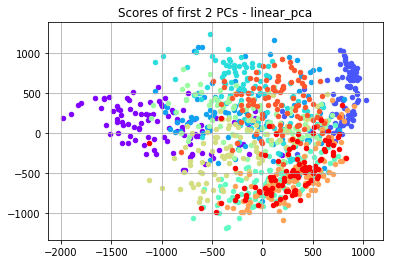

In [46]:
num_subset = 10
num_img = 100
num_PC = 2

Digits = ['d'+str(i) for i in range(num_subset)]
# Digits = ['d0','d7','d9']
X = np.zeros((28*28, num_subset*num_img))
colors = cm.rainbow(np.linspace(0, 1, num_subset)) 

for i,digit in enumerate(Digits):
    for j in range(num_img):
        X[:, i*num_img+j] = imageio.imread('mnist/' + digit + '/' + digit + '_' + '%04d.png'%(j+1)).ravel()

Score = linear_pca(X, num_PC)

for i, color in enumerate(colors):
    plt.scatter(Score[0, i*num_img:(i+1)*num_img], Score[1, i*num_img:(i+1)*num_img], c=color,s=20)
plt.title('Scores of first 2 PCs - linear_pca')
plt.grid()
plt.show()

## 1. Linear Kernel PCA
Complete the function `gram_pca` such that it has the same functionality as `linear_pca` but expects a gram matrix $\mathbf{K}=\mathbf{X}^\mathrm{T}\mathbf{X}$ instead of the data matrix $\mathbf{X}$ as its input. Do not assume that $\mathbf{K}$ was produced from centered data. Note: It is important to be consistent in notation here. E.g., for a data matrix of $1000$ MNIST images, we have $\mathbf{X}\in \mathbb{R}^{784 \times 1000}$ and $\mathbf{K}\in \mathbb{R}^{1000 \times 1000}$.

In [47]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    H = np.eye(K.shape[0]) - np.ones((K.shape[0],K.shape[0]))/K.shape[0]
    K_centered = np.matmul(np.matmul(H, K), H)
    Eig_val, Eig_vec = np.linalg.eig(K_centered)
    Sigma_g = np.real(np.sqrt(Eig_val))
    Score_g = np.matmul(np.diag(Sigma_g[:k]), np.real(Eig_vec[:,:k].T))
    return Score_g

Test your implementation and show that `gram_pca(dot(X.T, X), k)` yields results equivalent to those of `liear_pca(X, k)`.

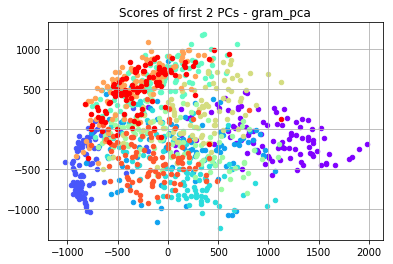

In [48]:
Score_gram = gram_pca(X.T.dot(X), num_PC)

for i, color in enumerate(colors):
    plt.scatter(Score_gram[0, i*num_img:(i+1)*num_img], Score_gram[1, i*num_img:(i+1)*num_img], c=color, s=20)
plt.title('Scores of first 2 PCs - gram_pca')
plt.grid()
plt.show()

## 2. Gaussian Kernel PCA
There is an unknown vector space $\mathbb{H}$, equipped with an inner product $\langle \cdot, \cdot \rangle_{\mathbb{H}}$ and a function

$$
\varphi : \mathbb{R}^p \rightarrow \mathbb{H},
$$

such that

$$
\langle \varphi(\mathbf{x}) , \varphi(\mathbf{y}) \rangle_\mathbb{H} = \exp{(-\frac{{\|\mathbf{x}-\mathbf{y}\|}^2}{2\sigma^2})}
$$
holds for every $\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$. The expression on the right-hand side of the equation is called the *Gaussian kernel* and $\sigma$ is a parameter to choose by hand.

The function `gaussian_kernel_pca` expects a data matrix $\mathbf{X}$, a reduced dimension number $k$ and a parameter $\sigma$. It returns the first $k$ *Kernel PCA* scores of the data. In other words, the function returns the first $k$ PCA scores of

$$
\varphi(\mathbf{x}_1), \varphi(\mathbf{x}_2), ..., \varphi(\mathbf{x}_N),
$$

where $\mathbf{x}_i$ denotes the $i$-th data sample/$i$-th column of the data matrix. The function `gaussian_kernel_pca` is already written, but for it to work, the function `compute_gaussian_gram_matrix` must return correct results. Complete `compute_gaussian_gram_matrix` accordingly.

In [49]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    dist = distance_matrix(X.T, X.T)
    K = np.exp(-(dist**2)/(2*(sigma**2)))
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S


Test `gaussian_kernel_pca` with some MNIST train images and $\sigma = 1000$.

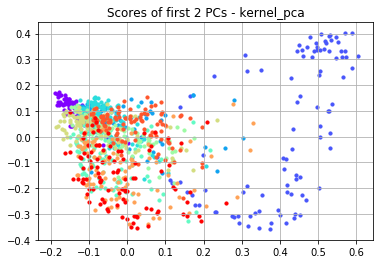

In [50]:
#Insert Code for Subtask 1.5 here
sigma = 1000
Score_kpca = gaussian_kernel_pca(X,num_PC,sigma)

for i, color in enumerate(colors):
    plt.scatter(Score_kpca[0, i*num_img:(i+1)*num_img], Score_kpca[1, i*num_img:(i+1)*num_img], c=color, s=10)
plt.title('Scores of first 2 PCs - kernel_pca')
plt.grid()
plt.show()